# ERC-4626: all vaults on Arbitrum

- In this notebook, we examine ERC-4626 vaults on a particular chain

## Usage

This is an open source notebook based on open data
- You can edit and remix this notebook yourself 

To do your own data research:

- Read general instructions [how to run the tutorials](./)
- See `ERC-4626: scanning vaults' historical price and performance` example in tutorials first how to build `vault-prices-1h.parquet` file.

For any questions, follow and contact [Trading Strategy community](https://tradingstrategy.ai/community).

## Setup

- Set up notebook rendering output mode
- Use static image charts so this notebook is readeable on Github / ReadTheDocs

In [1]:
import pandas as pd
from plotly.offline import init_notebook_mode
import plotly.io as pio

from eth_defi.vault.base import VaultSpec
from eth_defi.research.notebook import set_large_plotly_chart_font

# Fix X time axis bugs in Plotly charts
from eth_defi.monkeypatch import plotly

pd.options.display.float_format = "{:,.2f}".format
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Set up Plotly chart output as SVG
image_format = "png"
width = 1400
height = 800

# https://stackoverflow.com/a/52956402/315168
init_notebook_mode()

# https://plotly.com/python/renderers/#overriding-the-default-renderer
pio.renderers.default = image_format

current_renderer = pio.renderers[image_format]
# Have SVGs default pixel with
current_renderer.width = width
current_renderer.height = height

# Set all Plotly charts to use large font sizes for better readability,
# for sharing on mobile
set_large_plotly_chart_font(line_width=5, legend_font_size=16)
pio.templates.default = "custom"

## Read and clean raw scanned vault price data

- Read the Parquet file produced earlier with price scan 
- Clean the data if necessary

In [2]:
import pickle
from pathlib import Path

from eth_defi.vault.vaultdb import VaultDatabase

data_folder = Path("~/.tradingstrategy/vaults").expanduser()

vault_db = VaultDatabase.read()

cleaned_data_parquet_file = data_folder / "cleaned-vault-prices-1h.parquet"
prices_df = pd.read_parquet(cleaned_data_parquet_file)

print(f"We have {len(vault_db):,} vaults in the database and {len(prices_df):,} price rows.")

We have 26,146 vaults in the database and 5,920,333 price rows.


## Choose chain to examine

- [See ChainList.org](https://chainlist.org/)

In [3]:
from eth_defi.vault.base import VaultSpec
from eth_defi.chain import get_chain_name

selected_chain_id = 42161  # Arbitrum
# selected_chain_id = 1  # Ethereum Mainnet
chain_name = get_chain_name(selected_chain_id)

print(f"Examining chain {chain_name} ({selected_chain_id})")


Examining chain Arbitrum (42161)


## Price data filtering

- Filter rices for our chains only

In [4]:

# last_sample_at = prices_df.index[-1]
# one_month_ago = last_sample_at - pd.DateOffset(months=1)

# PERIOD = [
#    one_month_ago,
#    last_sample_at,
#]
#
# mask = (prices_df.index >= PERIOD[0]) & (prices_df.index <= PERIOD[1])
prices_df = prices_df[prices_df["chain"] == selected_chain_id]
print(f"Examined prices contain {len(prices_df):,} price rows across all vaults on {chain_name}.")

prices_df.head(4)

Examined prices contain 380,239 price rows across all vaults on Arbitrum.


id  chain  \
timestamp                                                                      
2025-08-20 10:45:30  42161-0x000a70c4887cc3974de7535623209ca01a215c50  42161   
2025-08-27 14:29:29  42161-0x000a70c4887cc3974de7535623209ca01a215c50  42161   
2025-12-10 19:39:45  42161-0x000a70c4887cc3974de7535623209ca01a215c50  42161   
2024-01-11 09:13:06  42161-0x0022228a2cc5e7ef0274a7baa600d44da5ab5776  42161   

                                                        address  block_number  \
timestamp                                                                       
2025-08-20 10:45:30  0x000a70c4887cc3974de7535623209ca01a215c50     370385921   
2025-08-27 14:29:29  0x000a70c4887cc3974de7535623209ca01a215c50     372862721   
2025-12-10 19:39:45  0x000a70c4887cc3974de7535623209ca01a215c50     409265921   
2024-01-11 09:13:06  0x0022228a2cc5e7ef0274a7baa600d44da5ab5776     169318721   

                     share_price  total_assets  total_supply  performance_fee  \
timestamp                                                                       
2025-08-20 10:45:30         1.00          1.33          1.33              NaN   
2025-08-27 14:29:29         1.00          1.34          1.33              NaN   
2025-12-10 19:39:45         1.00          1.34          1.33              NaN   
2024-01-11 09:13:06         1.00          1.00          1.00              NaN   

                     management_fee errors                          name  \
timestamp                                                                  
2025-08-20 10:45:30             NaN         Harvest: USDC Vault (0x000A)   
2025-08-27 14:29:29             NaN         Harvest: USDC Vault (0x000A)   
2025-12-10 19:39:45             NaN         Harvest: USDC Vault (0x000A)   
2024-01-11 09:13:06             NaN         Staked USDA (Arbitrum) #6442   

                     event_count                       protocol  \
timestamp                                                         
2025-08-20 10:45:30            5                Harvest Finance   
2025-08-27 14:29:29            5                Harvest Finance   
2025-12-10 19:39:45            5                Harvest Finance   
2024-01-11 09:13:06       638884  <protocol not yet identified>   

                     raw_share_price  returns_1h  avg_assets_by_vault  \
timestamp                                                               
2025-08-20 10:45:30             1.00        0.00                 1.34   
2025-08-27 14:29:29             1.00        0.00                 1.34   
2025-12-10 19:39:45             1.00        0.00                 1.34   
2024-01-11 09:13:06             1.00        0.00           861,406.06   

                     dynamic_tvl_threshold  tvl_filtering_mask  
timestamp                                                       
2025-08-20 10:45:30                   0.03                True  
2025-08-27 14:29:29                   0.03                True  
2025-12-10 19:39:45                   0.03                True  
2024-01-11 09:13:06              17,228.12                True

## Filter vaults

- Choose vaults on our chain
- Filter out junk entries

In [5]:
min_tvl = 50_000

vault_db_chain = {spec: row for spec, row in vault_db.items() if spec.chain_id == selected_chain_id}
vault_db = {spec: row for spec, row in vault_db_chain.items() if (row["NAV"] or 0) >= min_tvl}
selected_vault_ids = {spec.as_string_id() for spec in vault_db.keys()}
prices_df = prices_df.loc[prices_df["id"].isin(selected_vault_ids)]

print(f"We have selectd {len(vault_db)} vaults out of total of {len(vault_db_chain):,} vaults on chain {chain_name}, having {len(prices_df):,} price rows.")

print("An example vault metadata:")
example_vault = next(iter(vault_db.values()))
display(pd.DataFrame(list(example_vault.items()), columns=["Key", "Value"]))

We have selectd 279 vaults out of total of 5,885 vaults on chain Arbitrum, having 121,281 price rows.
An example vault metadata:


Key                                              Value
0                Symbol                                             plvGLP
1                  Name                                   Plutus Vault GLP
2               Address         0x5326e71ff593ecc2cf7acae5fe57582d6e74cff1
3          Denomination                                             plsGLP
4           Share token                                             plvGLP
5                   NAV                          218852.566660400704649665
6              Protocol                      <protocol not yet identified>
7              Mgmt fee                                               None
8              Perf fee                                               None
9           Deposit fee                                               None
10         Withdraw fee                                               None
11               Shares                          157940.074220509572793378
12           First seen                                2022-08-26 11:27:33
13             Features                                                   
14                 Link  https://routescan.io/address/0x5326E71Ff593Ecc...
15      _detection_data  ERC4262VaultDetection(chain=42161, address='0x...
16  _denomination_token  {'name': 'Plutus Staked GLP', 'symbol': 'plsGL...
17         _share_token  {'name': 'Plutus Vault GLP', 'symbol': 'plvGLP...
18                _fees  FeeData(fee_mode=None, management=None, perfor...
19               _flags                                                 {}
20              _lockup                                               None

## Calculate vault lifetime metrics

- Calculate the DataFrame of life time metrics for each vault


In [6]:
from eth_defi.research.vault_metrics import calculate_lifetime_metrics, clean_lifetime_metrics
from eth_defi.research.vault_metrics import format_lifetime_table

lifetime_data_df = calculate_lifetime_metrics(
    prices_df,
    vault_db,
)

print(f"Cleaning metrics for {len(lifetime_data_df):,} vaults")
lifetime_data_df = clean_lifetime_metrics(
    lifetime_data_df,
    max_annualised_return=0.99,  # 99% max return
)

print(f"Calculated lifetime metrics for {len(lifetime_data_df):,} vaults")

lifetime_data_df = lifetime_data_df.sort_values(["one_month_cagr"], ascending=False)

display(lifetime_data_df.head(2))

Calculating vault performance metrics:   0%|          | 0/128 [00:00<?, ?it/s]

Cleaning metrics for 128 vaults
Vault entries with too high NAV values filtered out: 16
Vault entries with too small ATH NAV values filtered out: 0
Vaults abnormally high returns: 7
Vault entries with too few deposit and redeem events (min 25) filtered out: 4
Calculated lifetime metrics for 99 vaults


/Users/moo/code/trade-executor/deps/web3-ethereum-defi/.venv/lib/python3.12/site-packages/tqdm/std.py:917: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name                vault_slug protocol_slug  \
115  Curve LLAMMA IBTC / crvUSD  curve-llamma-ibtc-crvusd        llamma   
11               Angmar Capital            angmar-capital        lagoon   

     lifetime_return  lifetime_return_net  cagr  cagr_net  \
115             0.15                 0.15  0.11      0.11   
11              0.04                 0.03  0.19      0.15   

     three_months_returns  three_months_returns_net  three_months_cagr  \
115                  0.08                      0.08               0.34   
11                   0.00                      0.00               0.00   

     three_months_cagr_net  three_months_sharpe  three_months_sharpe_net  \
115                   0.34                51.15                    51.15   
11                    0.00                 0.00                     0.00   

     three_months_volatility  one_month_returns  one_month_returns_net  \
115                     0.01               0.05                   0.05   
11                      0.00               0.01                   0.01   

     one_month_cagr  one_month_cagr_net denomination normalised_denomination  \
115            0.73                0.73       crvUSD                  CRVUSD   
11             0.18                0.14         USDC                    USDC   

    denomination_slug share_token     chain   peak_nav  current_nav  years  \
115            crvusd    cvcrvUSD  Arbitrum 407,182.92    63,434.13   1.33   
11               usdc   AngmarUSD  Arbitrum 508,489.00   508,489.00   0.20   

     mgmt_fee  perf_fee  deposit_fee  withdraw_fee  \
115      0.00      0.00         0.00          0.00   
11       0.00      0.20         0.00          0.00   

                               fee_mode fee_internalised  \
115  VaultFeeMode.internalised_skimming             True   
11            VaultFeeMode.externalised            False   

                                            gross_fees  \
115  FeeData(fee_mode=<VaultFeeMode.internalised_sk...   
11   FeeData(fee_mode=<VaultFeeMode.externalised: '...   

                                              net_fees fee_label lockup  \
115  FeeData(fee_mode=<VaultFeeMode.internalised_sk...   0% / 0% 0 days   
11   FeeData(fee_mode=<VaultFeeMode.externalised: '...  0% / 20%    NaT   

     event_count protocol                            risk  risk_numeric  \
115         1481   LLAMMA  VaultTechnicalRisk.blacklisted        999.00   
11           127   Lagoon      VaultTechnicalRisk.minimal         10.00   

                                                   id          start_date  \
115  42161-0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d 2024-08-19 17:01:50   
11   42161-0x1723cb57af58efb35a013870c90fcc3d60174a4e 2025-10-05 10:34:34   

               end_date                                     address  chain_id  \
115 2025-12-19 02:22:14  0xe296ee7f83d1d95b3f7827ff1d08fe1e4cf09d8d     42161   
11  2025-12-19 02:22:14  0x1723cb57af58efb35a013870c90fcc3d60174a4e     42161   

     stablecoinish    first_updated_at  first_updated_block  \
115           True 2024-08-19 17:01:50            244558721   
11            True 2025-10-05 10:34:34            386297921   

        last_updated_at  last_updated_block  last_share_price  \
115 2025-12-19 02:22:14           412131521              0.00   
11  2025-12-19 02:22:14           412131521              1.04   

                                        features flags  \
115                                [llamma_like]    {}   
11   [erc_7540_like, erc_7575_like, lagoon_like]    {}   

                                                 notes  \
115  Vault not actively listed on any known website...   
11                                                None   

                                                  link     one_month_start  \
115  https://www.curve.finance/lend/arbitrum/market... 2025-11-18 19:22:14   
11   https://app.lagoon.finance/42161/0x1723cb57aF5... 2025-11-18 23:22:35   

          one_month_end  one_month_samples  thre

## Top vault list

- List top vaults on the chain, formatted for readability



In [7]:
from eth_defi.research.vault_metrics import format_lifetime_table

min_tvl = 25_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

lifetime_data_filtered_df = lifetime_data_filtered_df.sort_values(["one_month_cagr"], ascending=False)

print(f"Vaults filtered by min TVL of ${min_tvl:,}, remaining {len(lifetime_data_filtered_df):,} vaults.")
formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
    add_address=True,
)

print(f"Last update {lifetime_data_filtered_df['last_updated_at'].max()}")

cols_to_move = ['Name', '1M return ann. (net / gross)']
other_cols = [col for col in formatted_df.columns if col not in cols_to_move]
formatted_df = formatted_df[cols_to_move + other_cols]

print(f"Formatted data for {len(formatted_df):,} vaults.")

# Script output
max_address_dump = 300
head = formatted_df.head(max_address_dump)
vault_count = min(max_address_dump, len(head))
print(f"Top {vault_count} vaults by 1 month annualised return are: {', '.join(head['Name'])}")
print(f"Top {vault_count} vaults by 1 month annualised return are:\n{', '.join(head['Address'])}")

display(formatted_df)


Vaults filtered by min TVL of $25,000, remaining 100 vaults.
Last update 2025-12-19 09:21:34
Formatted data for 96 vaults.
Top 96 vaults by 1 month annualised return are: Angmar Capital, Gravity Team LTD, Llamarisk crvUSD Vault, Yield Chasing USDC, Curve LLAMMA asdCRV / crvUSD, gmUSDC, YieldFi yUSD, gTrade (Gains Network USDC), Staked USDai, USDC-2 yVault, Ostium Liquidity Pool Vault, DAMM Stablecoin Fund, Plutus Hedge Token, Tokemak arbUSD, HYPE++, Yield Chasing crvUSD, Yield Chasing Silo USDC, Curve LLAMMA CRV / crvUSD, Hyperithm USDC, Euler Theo USDC, Clearstar High Yield USDC, Yearn Degen USDC, USDC-APE shares, K3 Capital USDai USDC, Saving USX, Curve LLAMMA ARB / crvUSD, Euler Earn USDC, Autopilot USDC Arbitrum, Clearstar USDC Reactor, Euler Arbitrum Yield USDC, Revert Lend Arbitrum USDC,, Steakhouse High Yield USDC, Gauntlet USDC Core, Spark USDC Vault, Dolomite: USDC, Edge UltraYield USDC, kpk USDC Yield, Harvest: USDC Vault (0xB01a), Dolomite: USDT, Steakhouse Prime USDC, Telle

Name 1M return ann. (net / gross)  \
#                                                                       
1                         Angmar Capital                14.2% (18.0%)   
2                       Gravity Team LTD                  --- (16.9%)   
3                 Llamarisk crvUSD Vault                15.6% (16.5%)   
4                     Yield Chasing USDC                15.5% (15.5%)   
5           Curve LLAMMA asdCRV / crvUSD                13.5% (13.5%)   
6                                 gmUSDC                 6.4% (10.3%)   
7                           YieldFi yUSD                   --- (9.5%)   
8            gTrade (Gains Network USDC)                  9.2% (9.2%)   
9                           Staked USDai                  9.2% (9.2%)   
10                         USDC-2 yVault                  8.2% (8.2%)   
11           Ostium Liquidity Pool Vault                  8.1% (8.1%)   
12                  DAMM Stablecoin Fund                  6.4% (8.1%)   
13                    Plutus Hedge Token                  8.0% (8.0%)   
14                        Tokemak arbUSD                  7.8% (7.8%)   
15                                HYPE++                  7.7% (7.7%)   
16                  Yield Chasing crvUSD                   --- (7.2%)   
17               Yield Chasing Silo USDC                  6.9% (6.9%)   
18             Curve LLAMMA CRV / crvUSD                  6.7% (6.7%)   
19                        Hyperithm USDC                  6.2% (6.2%)   
20                       Euler Theo USDC                  6.2% (6.2%)   
21             Clearstar High Yield USDC                  5.9% (5.9%)   
22                      Yearn Degen USDC                  5.7% (5.7%)   
23                       USDC-APE shares                   --- (5.5%)   
24                 K3 Capital USDai USDC                  5.3% (5.3%)   
25                            Saving USX                   --- (5.1%)   
26             Curve LLAMMA ARB / crvUSD                  5.0% (5.0%)   
27                       Euler Earn USDC                   --- (5.0%)   
28               Autopilot USDC Arbitrum                  4.5% (4.9%)   
29                Clearstar USDC Reactor                  4.7% (4.7%)   
30             Euler Arbitrum Yield USDC                  4.6% (4.6%)   
31            Revert Lend Arbitrum USDC,                   --- (4.6%)   
32            Steakhouse High Yield USDC                  4.4% (4.4%)   
33                    Gauntlet USDC Core                  4.4% (4.4%)   
34                      Spark USDC Vault                   --- (4.4%)   
35                        Dolomite: USDC                   --- (4.3%)   
36                  Edge UltraYield USDC                  4.2% (4.2%)   
37                        kpk USDC Yield                  4.0% (4.0%)   
38          Harvest: USDC Vault (0xB01a)                  4.0% (4.0%)   
39                        Dolomite: USDT                   --- (3.6%)   
40                 Steakhouse Prime USDC                  3.4% (3.4%)   
41                           Teller USDC                  3.2% (3.2%)   
42                       Fluid Gho Token                   --- (3.2%)   
43                        Fluid USD Coin                   --- (3.2%)   
44             Wrapped Aave Arbitrum GHO                   --- (3.1%)   
45            Static Aave Arbitrum USDCn                   --- (2.9%)   
46           Wrapped Aave Arbitrum USDCn                   --- (2.8%)   
47                       Summer.fi USD₮0                  2.8% (2.8%)   
48                   Gauntlet USDC Prime                  2.8% (2.8%)   
49                      Fluid Tether USD                   --- (2.7%)   
50             Static Aave Arbitrum USDT                   --- (2.5%)   
51            Wrapped Aave Arbitrum USDT                   --- (2.5%)   
52  Crypto.com Defi Wallet Compound USDC                   --- (2.5%)   
53      Crypto.com Defi Wallet AAVE USDC                   --- (2.5%)   
54             Trust 

## Top vault equity curve comparison

- Compare top vault equity curves 
- Compare net returns 
- Only vaults with fee data included
- Lookback 90 days


In [8]:
# Untangled Finance share price verification hack manual. verification
#
# from plotly import express as px

# # Looks like Untangled Finance has a real bug in onchain data
# # Block 389264321
# # Address 0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9
# # Vault share price drops 1.05 -> 0.44
# # Our share price cleaning cannot fix this big gab
# # https://www.tdly.co/shared/simulation/5428843e-3ac1-4f3a-acef-11d5d84acade
# df = prices_df.loc[prices_df.id == "42161-0x4a3f7dd63077cde8d7eff3c958eb69a3dd7d31a9"]
# df = df[pd.Timestamp("2025-10-13"):pd.Timestamp("2025-10-15")]
# # display(df)

# fig = px.line(
#     df,
#     x=df.index,
#     y="share_price",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

# fig = px.line(
#     df,
#     x=df.index,
#     y="returns_1h",
#     title="Untangled Finance vault share price drop on Arbitrum",
# )
# fig.show()

Skipping vault 42161-0x1fe806928cf2dd6b917e10d3a8e7b631b4e4940c: Gravity Team LTD due to missing fee data
Skipping vault 42161-0x4772d2e014f9fc3a820c444e3313968e9a5c8121: YieldFi yUSD due to missing fee data
Skipping vault 42161-0xea50f402653c41cadbafd1f788341db7b7f37816: Savings GYD due to missing fee data


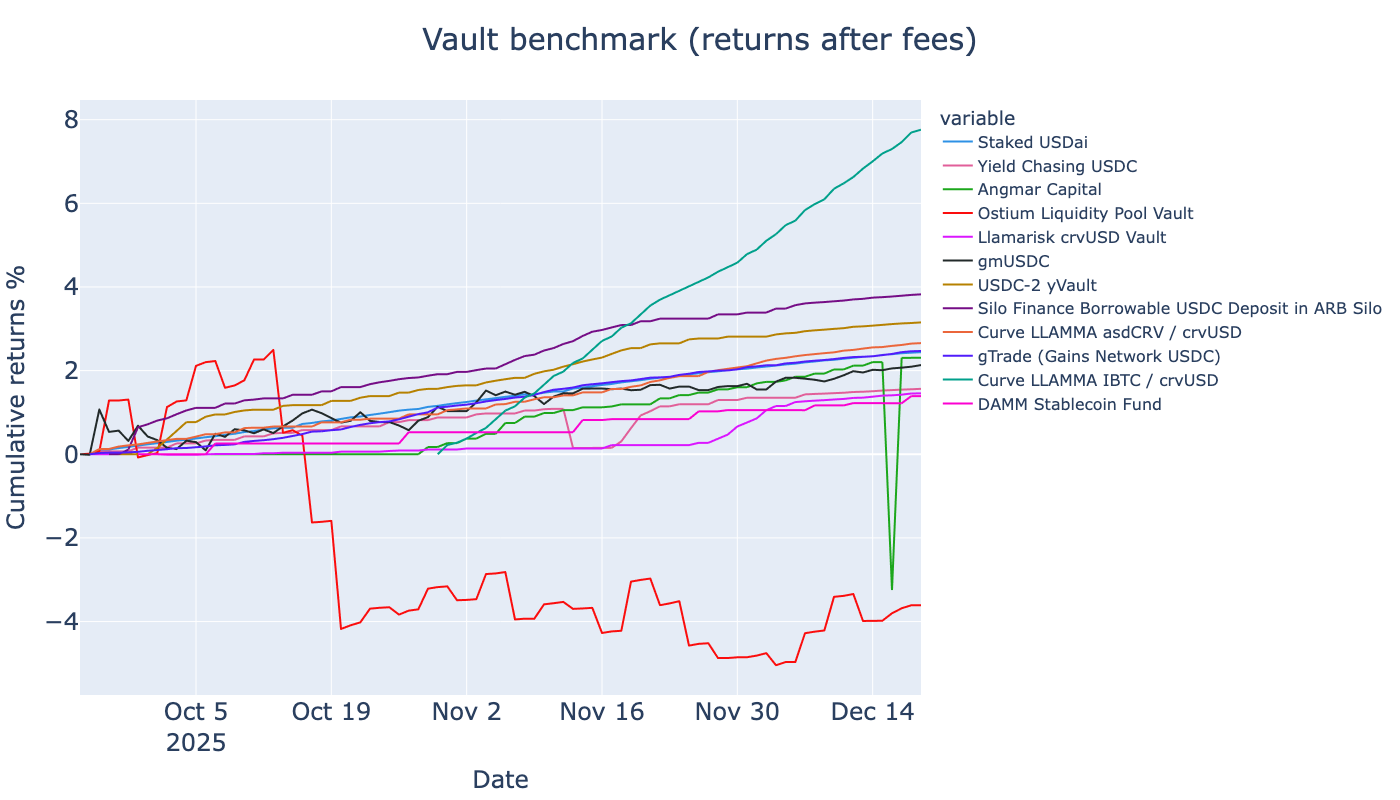

In [9]:
from eth_defi.research.vault_benchmark import visualise_vault_return_benchmark

top_count = 15

top_vaults_specs = lifetime_data_filtered_df.head(top_count)["id"].apply(VaultSpec.parse_string)

fig, net_returns_df = visualise_vault_return_benchmark(
    top_vaults_specs,
    prices_df=prices_df,
    vault_db=vault_db,
)

# display(net_returns_df)

fig.show()


## Top vaults correlation

- Check top vaults correlation matrix

In [10]:
# TODO

## Vault charts and performance tearsheets

- Show rolling returns performance chart for N top vaults

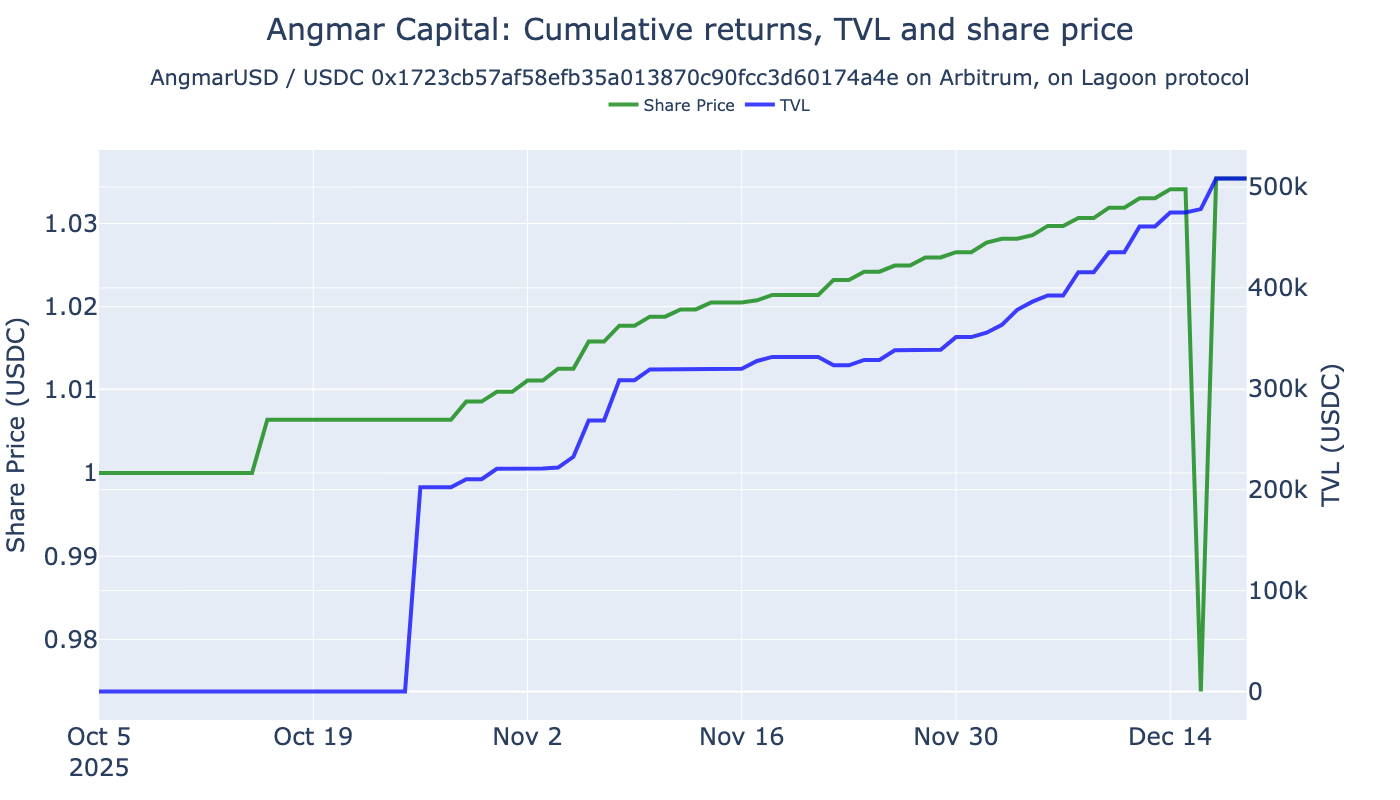

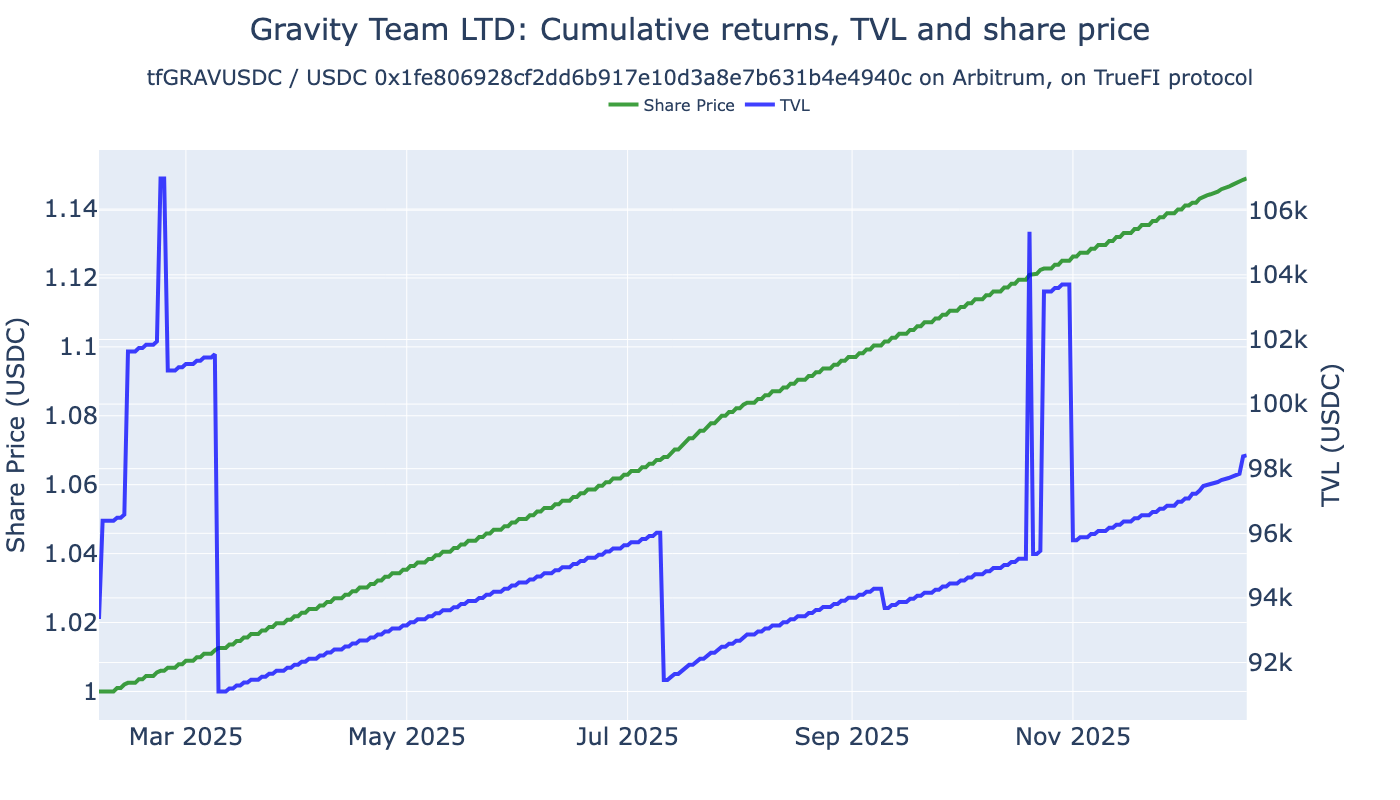

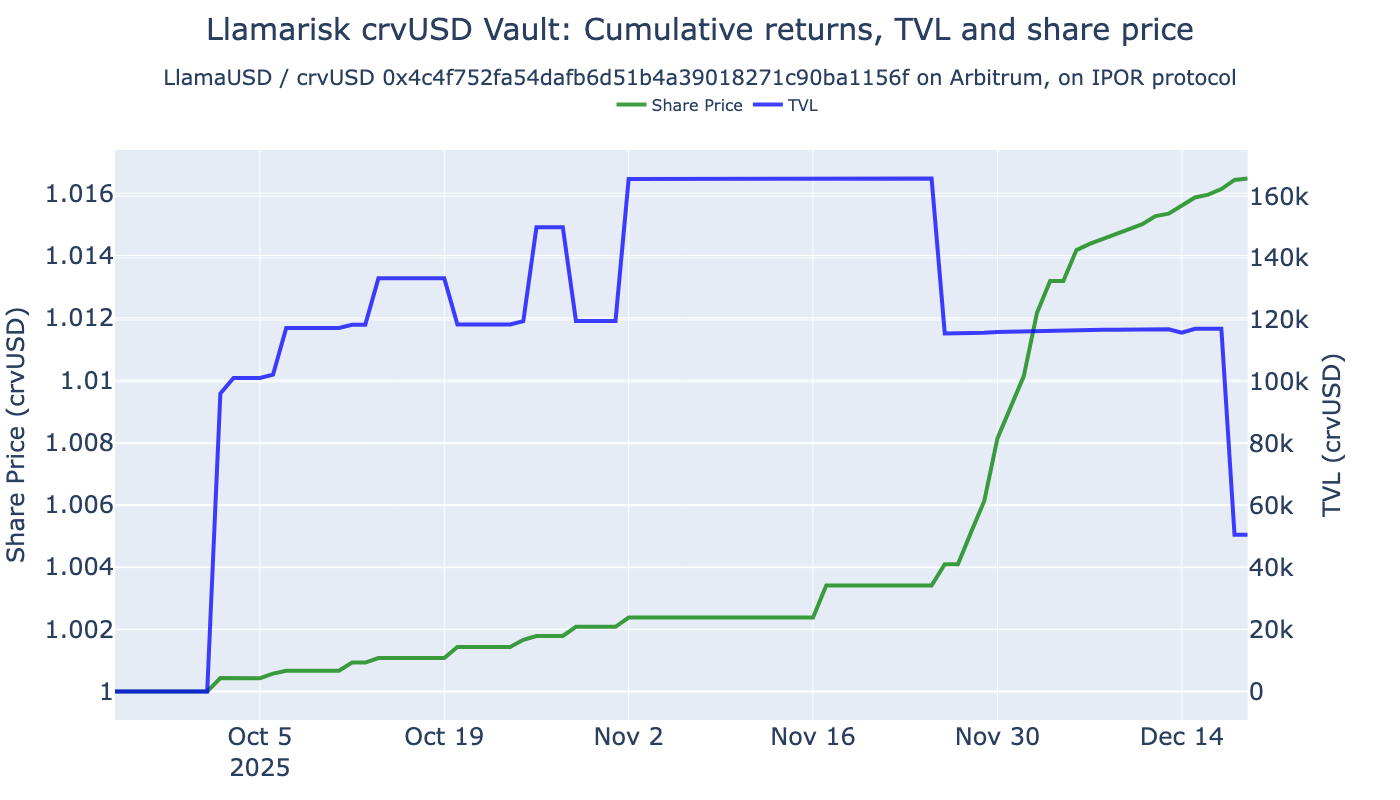

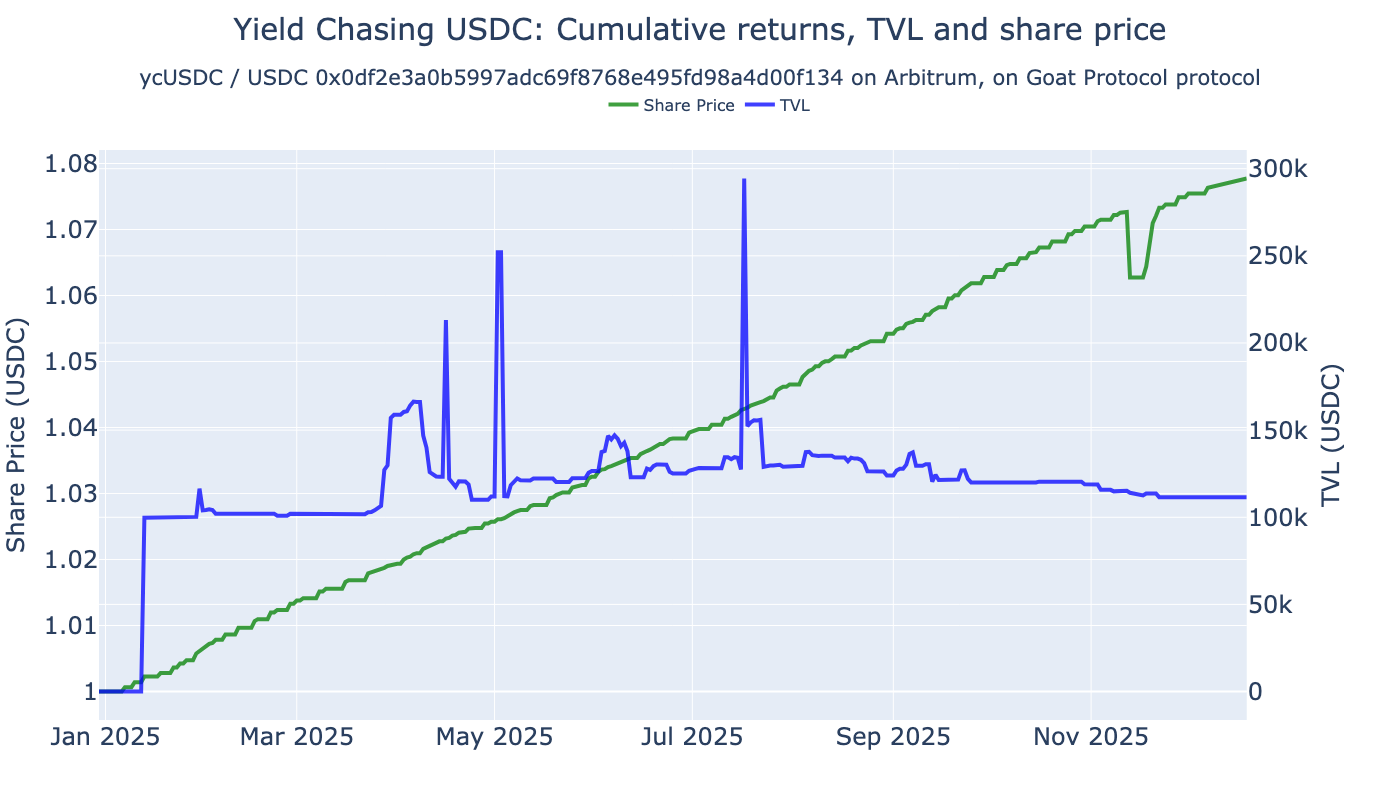

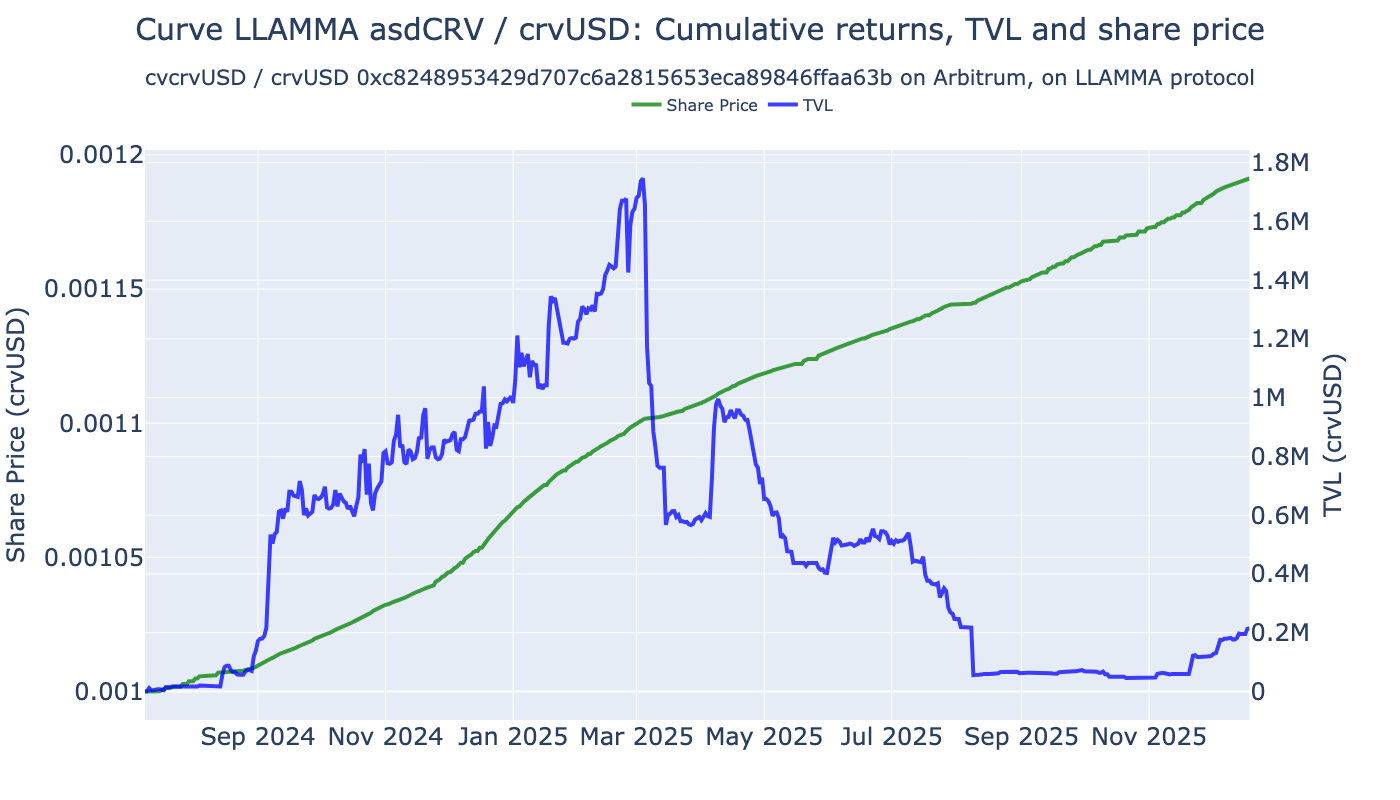

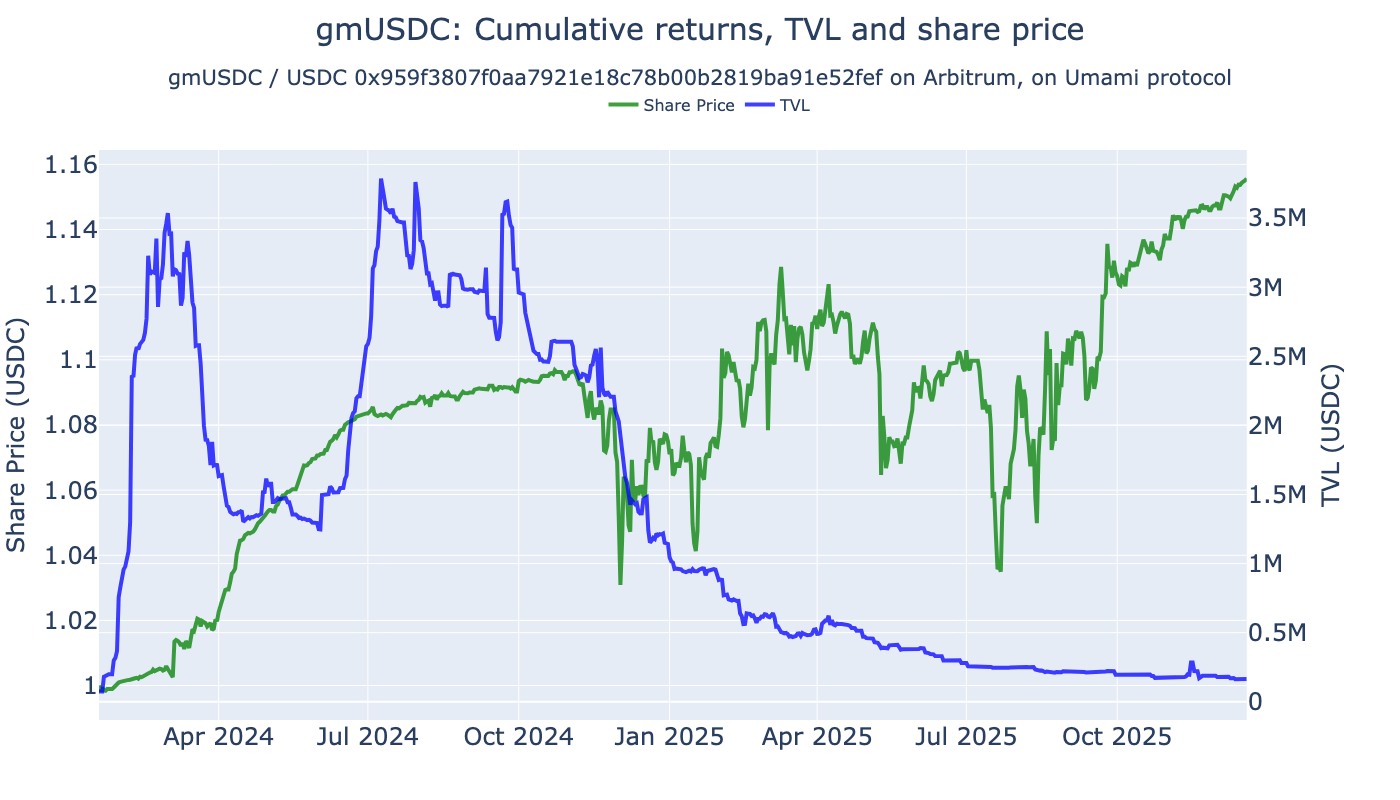

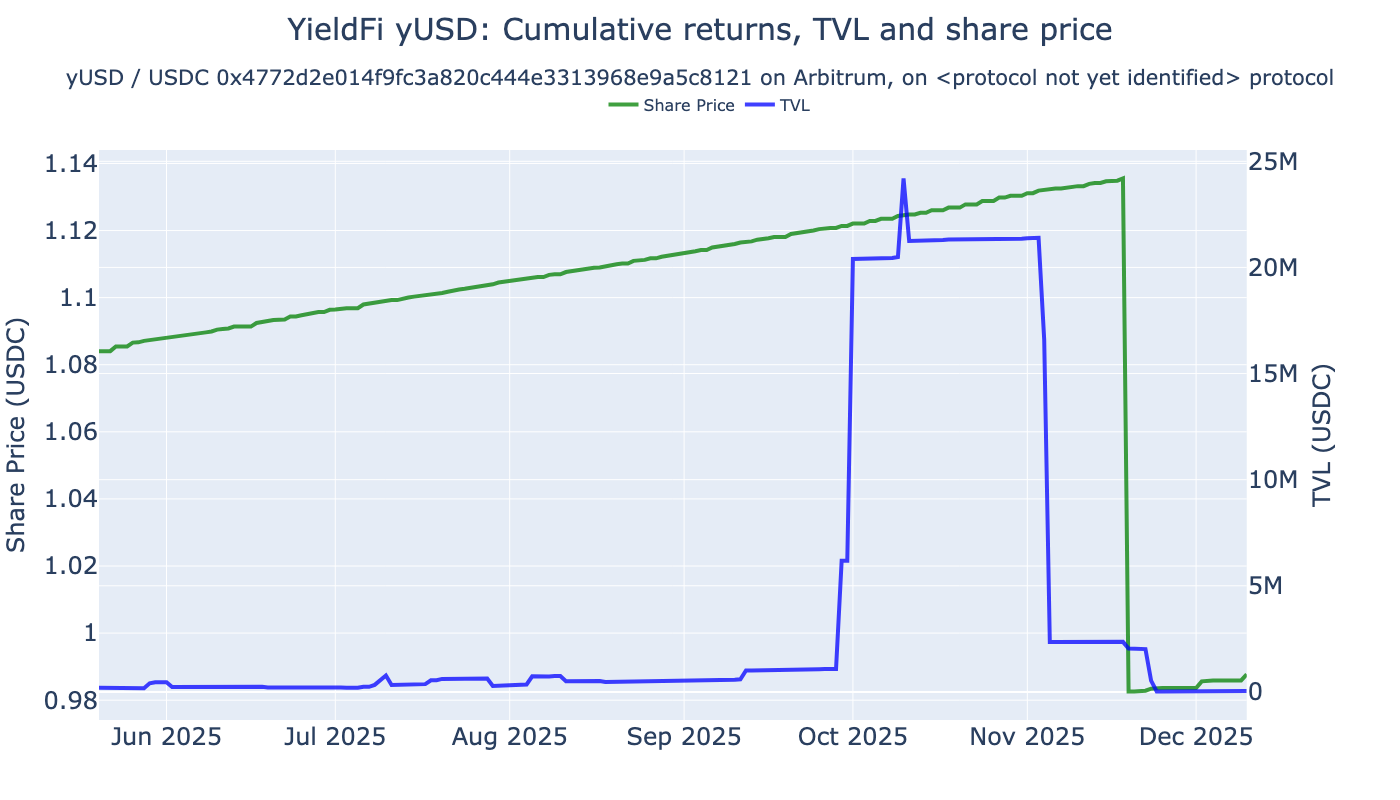

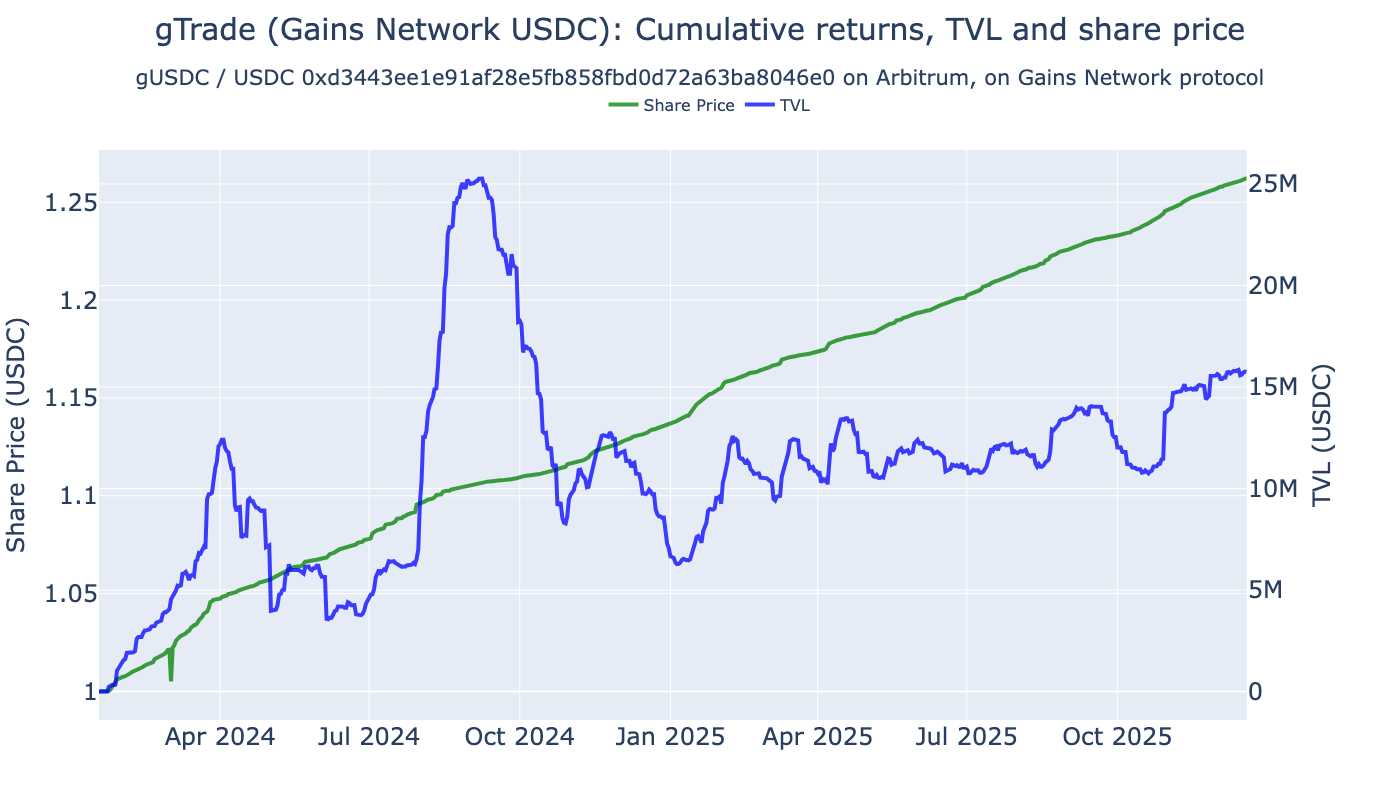

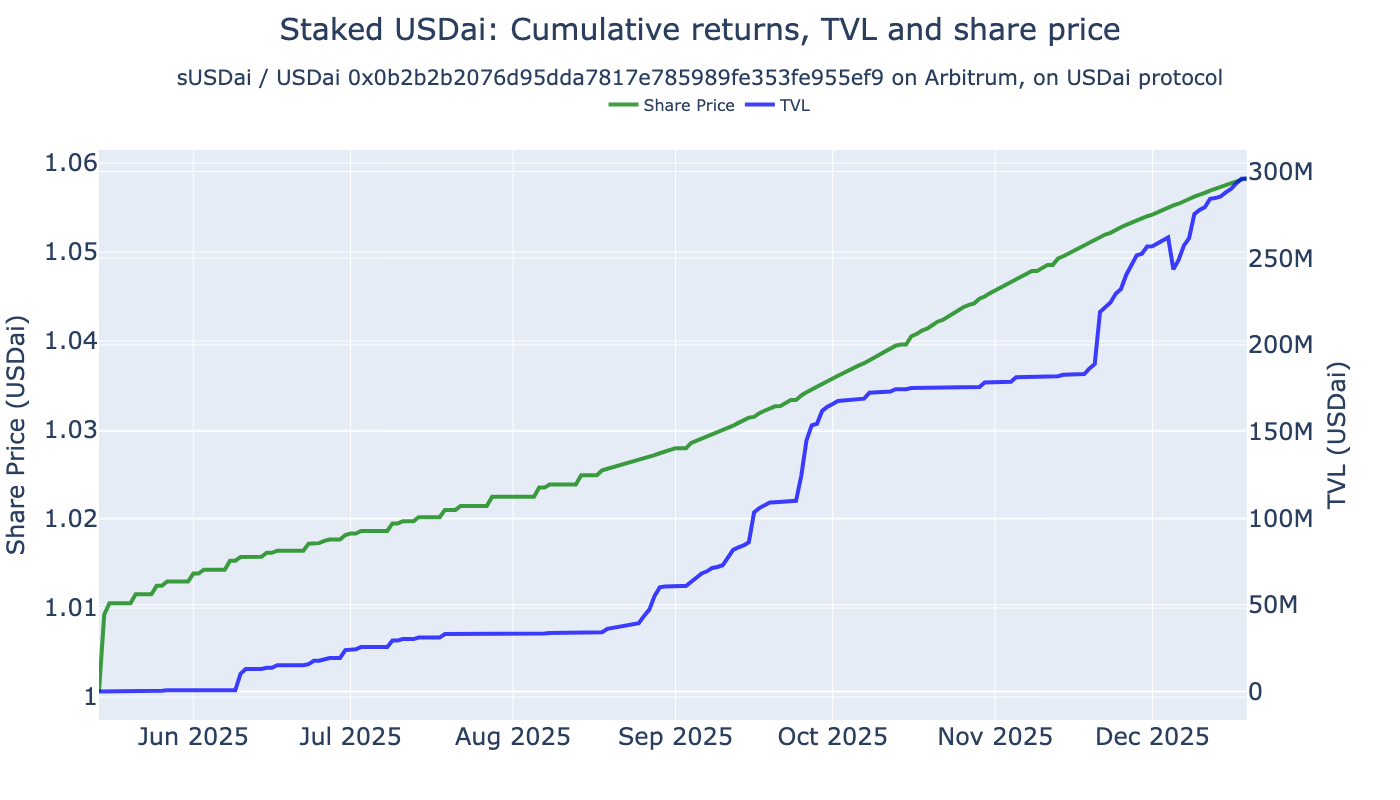

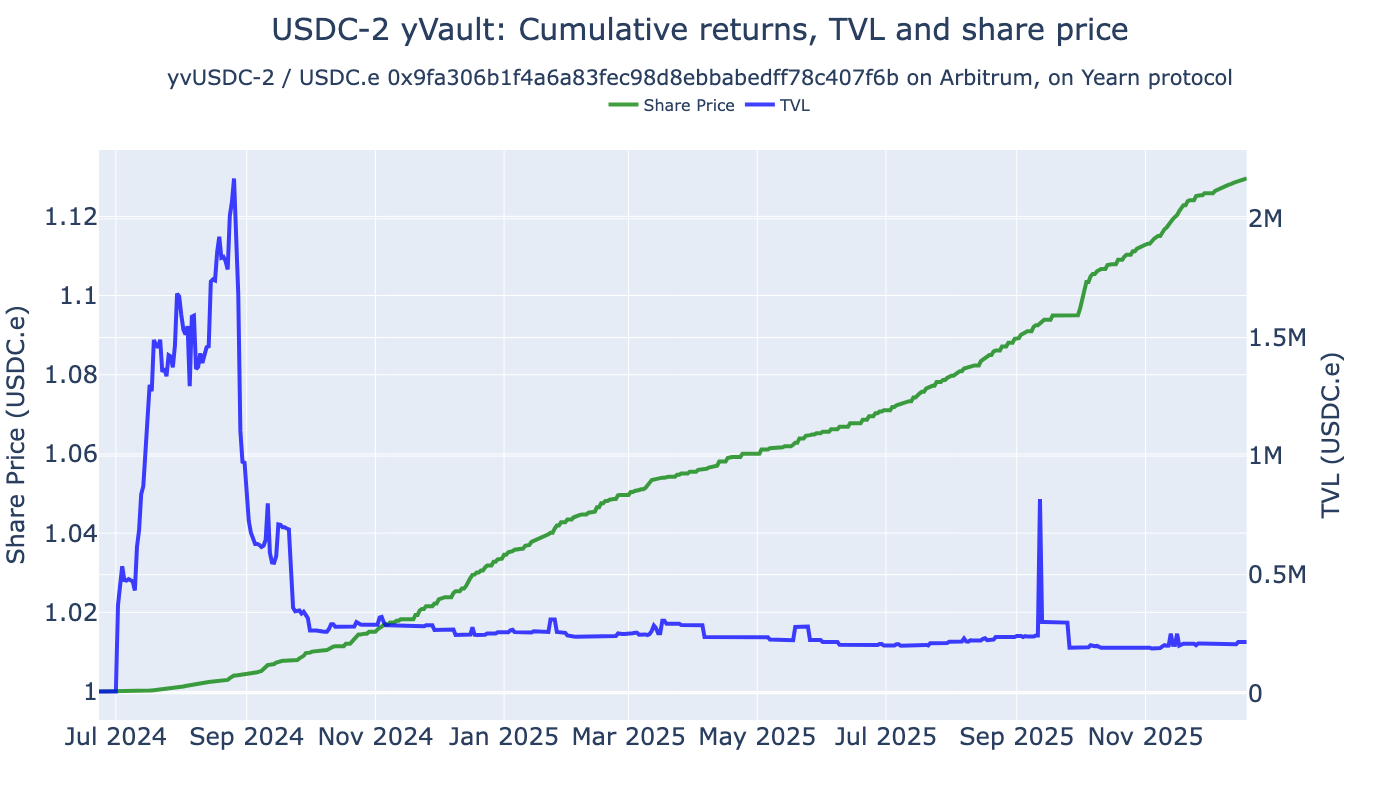

In [11]:
from eth_defi.research.vault_metrics import display_vault_chart_and_tearsheet
from eth_defi.vault.risk import VaultTechnicalRisk

examined_vaults_df = lifetime_data_filtered_df.loc[lifetime_data_filtered_df["risk"] != VaultTechnicalRisk.blacklisted]

interest_vault_specs = []

for idx, row in examined_vaults_df.head(10).iterrows():

    chain_id = row["id"].split("-")[0]
    address = row["id"].split("-")[1]
    vault_spec = VaultSpec(chain_id=int(chain_id), vault_address=address)

    # Used later
    interest_vault_specs.append(vault_spec)

    display_vault_chart_and_tearsheet(
        vault_spec,
        vault_db=vault_db,
        prices_df=prices_df,
        render=True,
    )


## Rolling returns comparison

- Show rolling returns of all picked vaults

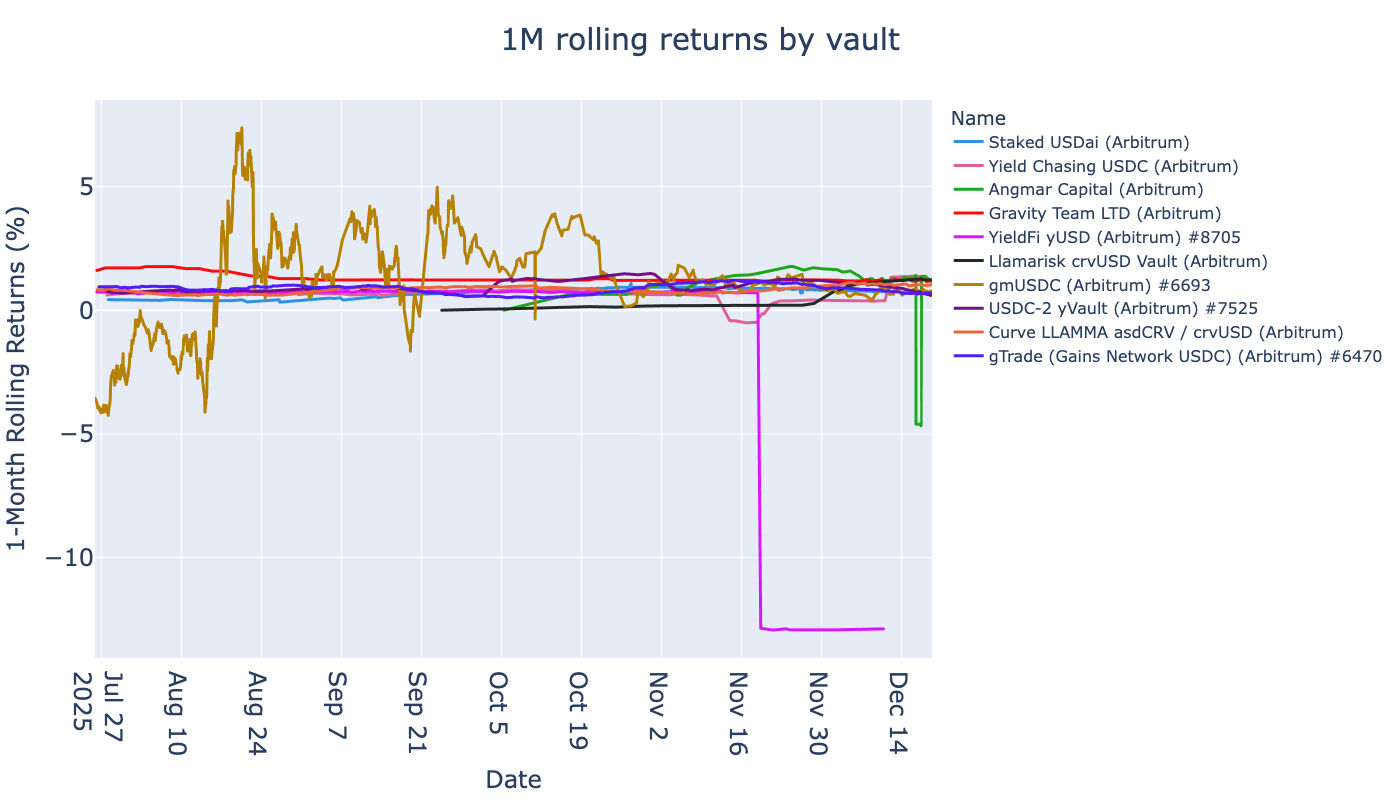

In [12]:
from eth_defi.research.rolling_returns import calculate_rolling_returns, visualise_rolling_returns

rolling_returns_df = calculate_rolling_returns(
    prices_df,
    interesting_vaults=[spec.as_string_id() for spec in interest_vault_specs],
    clip_up=100,
)

# display(rolling_returns_df.head(3))

assert len(rolling_returns_df) > 0, "No rolling returns calculated"

fig = visualise_rolling_returns(rolling_returns_df)

fig.show()

## All vaults

- List all vaults found on this chain



In [13]:
min_tvl = 1_000

lifetime_data_filtered_df = lifetime_data_df[lifetime_data_df["current_nav"] >= min_tvl]

formatted_df = format_lifetime_table(
    lifetime_data_filtered_df,
    add_index=True,
)

display(formatted_df)


Name Lifetime return abs. (net / gross)  \
#                                                                             
1                         Angmar Capital                        2.8% (3.5%)   
2                       Gravity Team LTD                        --- (14.9%)   
3                 Llamarisk crvUSD Vault                        1.5% (1.6%)   
4                     Yield Chasing USDC                        7.8% (7.8%)   
5           Curve LLAMMA asdCRV / crvUSD                      19.1% (19.1%)   
6                                 gmUSDC                       9.4% (15.6%)   
7                           YieldFi yUSD                        --- (-8.9%)   
8            gTrade (Gains Network USDC)                      26.2% (26.2%)   
9                           Staked USDai                        5.8% (5.8%)   
10                         USDC-2 yVault                      13.0% (13.0%)   
11           Ostium Liquidity Pool Vault                        8.2% (8.2%)   
12                  DAMM Stablecoin Fund                        1.9% (2.4%)   
13                    Plutus Hedge Token                      18.7% (18.7%)   
14                        Tokemak arbUSD                        8.7% (8.7%)   
15                                HYPE++                      41.9% (41.9%)   
16                  Yield Chasing crvUSD                        --- (12.7%)   
17               Yield Chasing Silo USDC                      10.7% (10.7%)   
18             Curve LLAMMA CRV / crvUSD                      23.7% (23.7%)   
19                        Hyperithm USDC                        2.2% (2.2%)   
20                       Euler Theo USDC                        1.4% (1.4%)   
21             Clearstar High Yield USDC                        1.3% (1.3%)   
22                      Yearn Degen USDC                        1.9% (1.9%)   
23                       USDC-APE shares                         --- (0.5%)   
24                 K3 Capital USDai USDC                        1.9% (1.9%)   
25                            Saving USX                        --- (12.6%)   
26             Curve LLAMMA ARB / crvUSD                        4.8% (4.8%)   
27                       Euler Earn USDC                         --- (1.6%)   
28               Autopilot USDC Arbitrum                    -58.0% (-57.9%)   
29                Clearstar USDC Reactor                        2.1% (2.1%)   
30             Euler Arbitrum Yield USDC                        1.5% (1.5%)   
31            Revert Lend Arbitrum USDC,                        --- (12.1%)   
32            Steakhouse High Yield USDC                        1.6% (1.6%)   
33                    Gauntlet USDC Core                        1.8% (1.8%)   
34                      Spark USDC Vault                         --- (3.7%)   
35                        Dolomite: USDC                         --- (8.7%)   
36                  Edge UltraYield USDC                        0.5% (0.5%)   
37                        kpk USDC Yield                        1.0% (1.0%)   
38          Harvest: USDC Vault (0xB01a)                        9.9% (9.9%)   
39                        Dolomite: USDT                         --- (8.6%)   
40                 Steakhouse Prime USDC                        1.5% (1.5%)   
41                           Teller USDC                        0.3% (0.3%)   
42                       Fluid Gho Token                         --- (1.4%)   
43                        Fluid USD Coin                         --- (9.3%)   
44             Wrapped Aave Arbitrum GHO                         --- (3.2%)   
45            Static Aave Arbitrum USDCn                        --- (10.4%)   
46           Wrapped Aave Arbitrum USDCn                         --- (3.3%)   
47                       Summer.fi USD₮0                        3.6% (3.6%)   
48                   Gauntlet USDC Prime                        1.2% (1.2%)   
49                      Fluid Tether USD                         --- (9.6%)   
50     